In [0]:
import cv2
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
# utilizei o googlecolab e drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
local = '/content/drive/My Drive/Trabalho-Visao-Computacional/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
subjects = ["", "Ramiz Raja", "Elvis Presley"]

**Preparando as imagens**

A etapa de preparação dos dados pode ser dividida em sub-etapas a seguir.

1. Leia todos os nomes de pastas das pessoas pasta treinamento. Por exemplo: p1, p2.
2.   Para cada, extraio o número da etiqueta. Os nomes das pastas seguem o formato pLabel, em que Label é um número inteiro que representa o rótulo que atribuímos a essa pessoa.
3. Ler todoas imagens e detectar os rostos.
4. Adicionar cada face ao vetor de faces com o rótulo do rosto correspondente.



In [0]:
# função para detectar face usando OpenCv
def detect_face(img):
  # converte imagem para escala da cinza
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # carrega o detector de face do Open utilizando LBP, é mais rápido
  face_cascade = cv2.CascadeClassifier(local + 'opencv-files/lbpcascade_frontalface.xml')  

  # detectando imagens em escala múltipla (algumas imagens podem estar mais próximas da câmera do que outras)
  #result é uma lista de rostos
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
  
  # se a face não é detectada, retorna a img original 
  if (len(faces) == 0):
    return None, None
  
  # sob a suposição de que haverá apenas uma face, extrair a área do rosto
  (x, y, w, h) = faces[0]

  # retorna apenas a parte do face da imagem
  return gray[y:y+w, x:x+h], faces[0]


*Estou usando o detector de rosto LBP do OpenCV. Converto a imagem em escala de cinza porque a maioria das operações no OpenCV é realizada em escala de cinza e, carrego o detector de rosto LBP usando a classe cv2.CascadeClassifier. Depois disso, é usado uso o método detectMultiScale da classe cv2.CascadeClassifier '' para detectar todas as faces da imagem. A partir das faces detectadas, escolho apenas a primeira face, porque em uma imagem haverá apenas uma face (supondo que haverá apenas uma face proeminente). Como os rostos retornados pelo método detectMultiScale são na verdade retângulos (x, y, largura, altura) e não imagens reais de rostos, portanto, precisamos extrair a área da imagem da face da imagem principal. Assim, extraio a área da face da imagem cinza e retorno a área da imagem e o retângulo da face.*

In [0]:
# esta função lê as imagens de treinamento de todas as pessoas, detecta o rosto de cada imagem
# e retornará duas listas exatamente do mesmo tamanho, uma lista
# Nº de rostos e outra lista de rótulos para cada rosto
def prepare_training_data(data_folder_path):    
    #------PASSO-1--------
    # obtem os diretorórios
    dirs = os.listdir(data_folder_path)
    
    # lista com todos os rostos
    faces = []
    # lista com todos os rotulos de todos rostos
    labels = []
    
    # percorrendo cada diretório e lendo imagens dentro dele
    for dir_name in dirs:
        
        # ler apenas diretórios que iniciem com a letra 'p'
        if not dir_name.startswith("p"):
            continue;
            
        #------PASSO-2--------        
        # extrair o número do rótulo do assunto de dir_name
        # formato do nome do diretório = plabel,
        # removendo as letras 'p' de dir_name nos dará o rótulo        
        label = int(dir_name.replace("p", ""))

        # caminho de construção do diretório que contém imagens para o assunto atual,
        # exemplo subject_dir_path = "data-treinamento / s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        # obtendo os nomes das imagens que estão dentro do diretório de assunto fornecido
        subject_images_names = os.listdir(subject_dir_path)
        
        #------PASSO-3--------     
        # passando pelo nome de cada imagem, lendo a imagem,
        # detectando o rosto e adicionando o rosto à lista de rostos
        for image_name in subject_images_names:
            
            # ignore arquivos do sistema como .DS_Store
            if image_name.startswith("."):
                continue;
            
            # construindo caminha da imagem
            # exemplpo = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            # lendo imagem
            image = cv2.imread(image_path)
            
            # exibir uma janela de imagem para mostrar a imagem
            #cv2.imshow("Treinando com imagem...", image)
            cv2.waitKey(100)
            
            # detectando rosto
            face, rect = detect_face(image)
            
            #------PASSO-4--------
            # Ignorando rostos que não são detectados
            if face is not None:
                # adicionando rostos na lista de faces
                faces.append(face)
                # adicionando rótulo para este rosto
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels

*(passo 1) Utilizando o método os.listdir para ler os nomes de todas as pastas armazenadas no caminho passado para funcionar como parâmetro.*

*(passo 2) Depois disso, percorro todos os nomes de pastas dos sujeitos e, a partir do nome de cada pasta, são extraída as informações da etiqueta. Como os nomes das pastas seguem a convenção de nomenclatura pLabel, a remoção das letras p do nome da pasta fornecerá o rótulo atribuído a esse assunto*.

*(passo 3) leio todos os nomes das imagens do assunto atual que está sendo percorrido e passo por essas imagens uma a uma. Usando o imshow (window_title, image) do OpenCV junto com o método waitKey (interval) do OpenCV para exibir a imagem atual que está sendo rastreada. O método waitKey (interval) pausa o fluxo de código para o intervalo especificado (milissegundos); estou usando-o com um intervalo de 100ms para que possamos visualizar a janela da imagem por 100ms.*

*(passo 4) É adicionado a face e o rótulo detectados aos seus respectivos vetores.*

**INICIANDO OS TESTE**

In [0]:
# primeiro prepararos os dados de treinamento, os data estarão em duas listas do mesmo tamanho, uma lista conterá todas as faces 
# e outra lista conterão os respectivos rótulos para cada face
print("Preparando os dados...")
faces, labels = prepare_training_data(local + "training-data")
print("Dados prontos")

# imprime total de faces e rótulos
print("Total faces: ", len(faces))
print("Total rótulos: ", len(labels))

Preparando os dados...
Dados prontos
Total faces:  23
Total rótulos:  23


In [0]:
faces

[array([[208, 208, 209, ..., 194, 194, 194],
        [208, 208, 209, ..., 194, 194, 194],
        [208, 208, 209, ..., 194, 194, 194],
        ...,
        [217, 214, 215, ..., 197, 197, 198],
        [217, 214, 215, ..., 197, 198, 198],
        [217, 214, 215, ..., 198, 198, 198]], dtype=uint8),
 array([[246, 245, 243, ..., 255, 255, 255],
        [245, 243, 242, ..., 255, 255, 255],
        [244, 243, 242, ..., 255, 255, 255],
        ...,
        [129, 133, 134, ..., 255, 255, 255],
        [129, 132, 135, ..., 255, 255, 255],
        [125, 129, 133, ..., 255, 255, 255]], dtype=uint8),
 array([[249, 249, 249, ..., 147, 161, 166],
        [249, 249, 248, ..., 131, 151, 163],
        [251, 251, 251, ..., 127, 136, 149],
        ...,
        [116, 113, 111, ...,  34,  21,  54],
        [111, 109, 105, ...,  19,  47,  48],
        [105, 103, 101, ...,  22,  51,  50]], dtype=uint8),
 array([[218, 218, 218, ..., 219, 220, 220],
        [218, 218, 218, ..., 208, 220, 220],
        [218, 21

In [0]:
labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

**LOCAL BINARY PATTERNS HISTOGRAMS**

In [0]:
# inicializando o identificador
face_recognizer_lbp = cv2.face.LBPHFaceRecognizer_create()

# Treinando
face_recognizer_lbp.train(faces, np.array(labels))


In [0]:
# função para desenhar retangulo na imagem
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#função para inserir o texto na imagem, a partir da cordenada X, y. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

**Predição**

In [0]:
# Esta função reconhece a pessoa na imagem, desenha o retangulo em volta da face com o nome da pessoa
def predict(test_img, modelo):
    # faz uma cópia da imagem para que seja alterada a original
    img = test_img.copy()

    #imgPre = cv2.imread(test_img)
    #if imgPre is None:
      #return
    #img = imgPre.copy()

    # detectando a face na imagem
    face, rect = detect_face(img)

    # prevendo a imagem usando o modelo escolhido
    if modelo == "lbp":
      label = face_recognizer_lbp.predict(face)
    elif modelo == "ef":
      label = face_recognizer_ef.predict(face)
    else:
      label = face_recognizer_ff.predict(face)
    
    # obtem o rótulo retornado pelo reconhecedor
    label_text = subjects[label[0]]
    
    # desenha o retangulo ao redor do rosto
    draw_rectangle(img, rect)

    # coloca o nome da pessoa
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Text(0.5, 1.0, 'Test2')

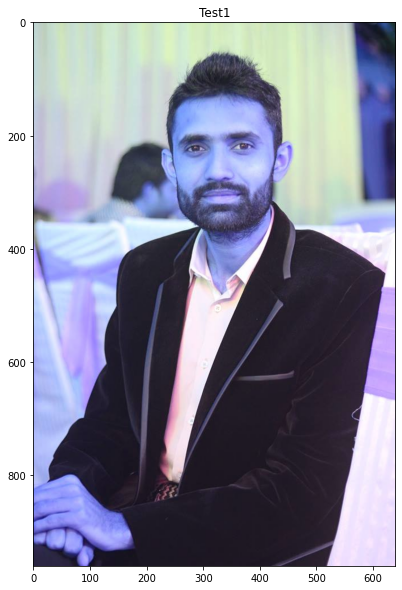

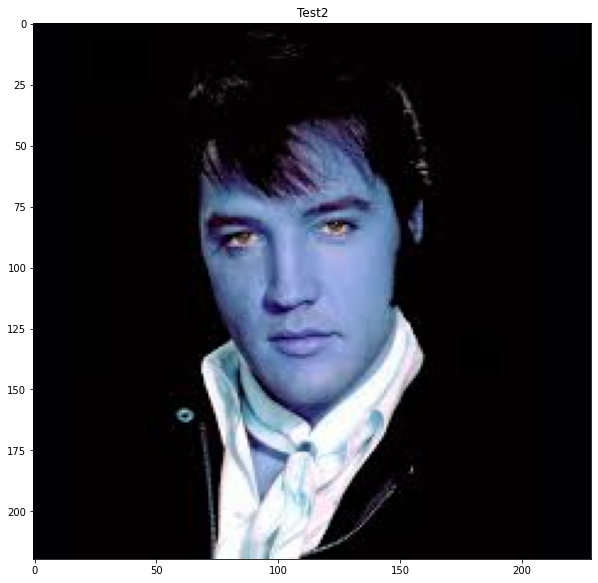

In [0]:
# carregando imagens de teste
test_img1 = cv2.imread(local + "test-data/test1.jpg")
test_img2 = cv2.imread(local + "test-data/test2.jpg")

plt.figure(figsize=(10,10))
plt.imshow(test_img1)
plt.title("Test1")

plt.figure(figsize=(10,10))
plt.imshow(test_img2)
plt.title("Test2")

In [0]:
test_img1

array([[[188, 209, 206],
        [189, 210, 207],
        [190, 211, 208],
        ...,
        [ 31,  43,  45],
        [ 33,  41,  48],
        [ 33,  41,  48]],

       [[188, 209, 206],
        [189, 210, 207],
        [190, 211, 208],
        ...,
        [ 33,  45,  47],
        [ 33,  44,  48],
        [ 33,  43,  50]],

       [[188, 209, 206],
        [189, 210, 207],
        [190, 211, 208],
        ...,
        [ 33,  46,  48],
        [ 33,  45,  49],
        [ 33,  45,  49]],

       ...,

       [[ 41,  36,  65],
        [ 41,  36,  65],
        [ 41,  36,  65],
        ...,
        [240, 218, 253],
        [241, 217, 252],
        [240, 216, 251]],

       [[ 41,  36,  65],
        [ 41,  36,  65],
        [ 41,  36,  65],
        ...,
        [241, 217, 252],
        [240, 216, 251],
        [240, 216, 251]],

       [[ 41,  36,  65],
        [ 41,  36,  65],
        [ 41,  36,  65],
        ...,
        [241, 217, 252],
        [240, 216, 251],
        [239, 215, 250]]

In [0]:
test_img2

array([[[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [1, 0, 2],
        [1, 0, 2],
        [1, 0, 2]],

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [1, 0, 2],
        [1, 0, 2],
        [1, 0, 2]],

       [[1, 0, 2],
        [1, 0, 2],
        [1, 0, 2],
        ...,
        [1, 0, 2],
        [1, 0, 2],
        [1, 0, 2]]], dtype=uint8)

In [0]:
# realizando predição
predicted_img1 = predict(test_img1,"lbp")
predicted_img2 = predict(test_img2,"lbp")
print("Predição completa")

Predição completa


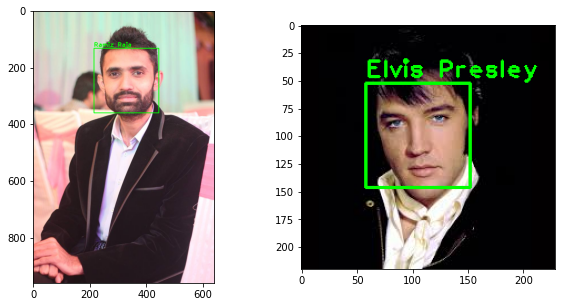

In [0]:
# criando uma figura de 2 plots ( um para cada imagem)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# exibindo resultado teste imagem 1
ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))

# exibindo resultado teste imagem 2
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))

# exibindo ambas imagens
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.destroyAllWindows()

Os códigos anteriores de preparação dos dados funciona para todo os modelos, com a resalva que para que esses funcione, é necessário padronizar o tamanho das imagens. A Função ***predict*** já esta preparada para receber qualquer um dos modelos, basta passar o qual o parametro de cada um:

*   lbd - Local Binary Patterns
*   ef - Eigenface
*   ff - Fisherface








**EIGENFACE**

In [0]:
# inicializando o identificador
face_recognizer_ef = cv2.face.EigenFaceRecognizer_create()

# Treinamento (Para que funcione o EigenFace, todas as imagens devem estar como mesmo tamanho)
face_recognizer_ef.train(faces, np.array(labels))

**FISHERFACE**

In [0]:
# inicializando o identificador

face_recognizer_ef = cv2.face.FisherFaceRecognizer_create()

# Treinando (Para que funcione o EigenFace, todas as imagens devem estar como mesmo tamanho)
face_recognizer_ef.train(faces, np.array(labels))